![tud_logo.jpg](attachment:tud_logo.jpg)

# Lab 4 - Sensitive Attributes and Data Bias
Week 4 - Q3, 22/23 <br>
SEN163B: Responsible Data Analytics<br>
 

By <b> Nadia Metoui* </b> <br>
TA <b> Anagha Magadi Rajeev</b> <br> 
Faculty of Technology, Policy, and Management (TPM)<br>

<small>*Acknowledgement: Part of this lab is loosely based on the code developed by <i><b>Agathe Balayn</b></i> and <i><b>Seda Gürses</b></i>

***Learning Objectives***<br>
At the end of this lab, you will be able to 

- Use data analytics tools to identify Sensitive attributes and proxies
- Use data analytics tools to identify Representation Bias
- Use data analytics tools to identify Historical Bias 
- Understanding, Analyse and Discuss Historical, Representation and Measurement Biases

***Structure***
- Part I. Understanding the Use Case
- Part II Protected attributes, proxies
- Part III: Representation Disparities, Skew and Bias
- Part IV. Discuss Measurement Bias

<H2> </H2>

## Part I. Understanding the Use Case

<b>Use Case Description</b> In this Lab you will be exploring a use case where a Bank wants to develop an ML-based data product in the form of ADM (automate decision system) to decide whether to <b>grant</b> or <b>not to grant</b> a loan to a given applicant. To do so the Bank uses historical data containing multiple application records, characterized by information about the loan applicants (e.g., age, gender, personal situation) and information about the loan (e.g., amount, duration, purpose). Each application is labeled <i><b> good credit </b></i> if the loan had been reimbursed or <i><b>bad credit</b></i> if the loan has not been reimbursed or if there where several issues with the reimbursement.

During this lab we will not concern our selves yet with developping (coding) the data analytics product itslef. 
We will rather explore the data using data analytics tools then reflect on three categories of Bias inspired by (Suresh and Guttag 2019)
- <i>Historical Bias</i>: Case Analysis, Sensitive attributes, Data skew
- <i>Representation Bias</i>: Case Analysis, Sensitive attributes, Distributions
- <i>Measurement Bias</i>: Case Analysis 



 
<i><b>German credit dataset</b></i> contains 1000 entries with 20 attributes (7 numerical, 13 categorical) prepared by Prof. Hofmann. We will use the version hosted in the <a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">UCI Machine Learning Archive</a>.<br>

In this dataset, each entry represents a person who took a credit from a german bank. We have no information about the date/year of the data collcetion. However, for the sake of this exercise, we will assume the data was collected in 2018.  

You can download the dataset here: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data<br>

The original data is encoded in a complex way. You can find information about the dataset and its attributes here: (https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc).<br>

We also provide you with the code to preprocess the data in more comprehensive attributes and featuers. 






Analysis Steps
- Step 1: Set-up (Provided)
- Step 2: Explore and familiarize with the dataset


### Setp 1: Set-up

You first need load (usually no installation is needed) the required libraries for this part.  The main libraries are `numpy`, `pandas`, `matplotlib` and `seaborn`. We recommend using these to easily manipulate and explore the data but you are free to use any other libraries you are more familar with.

We will introduce the data visualization tool 

<div class="alert alert-block alert-danger">
<b>Note:</b> Uncomment and run the next cell if you have not previously installed the libraries.
</div>


<b>Installing required libraries</b>

In [7]:
# If you need to install any new libraries, add the code here 

# install AIF 360 Toolkit
!pip install aif360


<b>Loading required libraries</b>

In [8]:
# Libraries for data processing and visualiztion 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as altair

from IPython.display import Markdown, display


# we will use the Faireness Tool IBM AI Fairness 360 only to help formatting the german data set 
# Please ignore this at the moment we will learn more about it in Week 6
from aif360.datasets import GermanDataset

<b>Download the German Credit Data set</b><br>
In the following we will download the data set and https://archive.ics.uci.edu its documentation from the website and place it in the correct. At this point in the course you should be able to do this on your own. But we provide some code to guide students who still need some help. Feel free to use, modify or discard this code. 

**Option 1 Google Colab:**<br>
Uncomment the following cell to download the dataset in google colab.

In [4]:
#Download the German Credit DataSet
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
!cp german.data /usr/local/lib/python3.8/dist-packages/aif360/data/raw/german/german.data
!cp german.doc /usr/local/lib/python3.8/dist-packages/aif360/data/raw/german/german.doc

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


**Option 2: Local environment**<br>
<div class="alert alert-block alert-danger">
<b>Note:</b> If you are working on your local environment you will have to manually add the files "german.doc" and "german.data" to the folder 
"dist-packages/aif360/data/raw/german/" under your python path.<br> 
(or write your script to do it deppending on the os/platform you are using)
You can find the files in the lab folder on github or download them from: <br>
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data">https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data</a> <br>
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc">https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc</a>
</div> 

<b>Loading the dataset</b>

Here, we will load the <i><b>German credit data</b></i> in a format that is compatible with the use of the <i><b>AIF360 toolkit</b></i>. For this, you need to make use of the already implemented class of the toolkit `GermanDataset()`.

Because the data available is encoded in a complex way, we provide you with the code to preprocess it, in the function `custom_preprocessing()`. We also provide you with an example on how to actually load the data using the `GermanDataset()` class, in `preproc_and_load_data_german()`. 

<small>*Note: We are not making use of AIF360 toolkit yet we will do it on week 6*</small>

In [2]:
import pandas as pd

df = pd.read_pickle("distance3.pickle")
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,OCC,OCC_END,Distance
0,506547392,03/29/2018,20:30:00,<NA>,NaN,32.0,2018-03-30,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F,2018-03-29,<NA>,0.000123
1,629632833,02/06/2018,23:15:00,<NA>,NaN,52.0,2018-02-07,341,PETIT LARCENY,333.0,...,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,D,2018-02-06,<NA>,0.000093
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,2018-11-21,341,PETIT LARCENY,321.0,...,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D,2018-11-21,11/21/2018,0.000091
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,2018-06-10,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F,2018-06-09,06/09/2018,0.000087
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,2018-11-10,341,PETIT LARCENY,333.0,...,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,D,2018-11-10,11/10/2018,0.000381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,104527061,05/01/2008,18:55:00,05/01/2018,19:00:00,10.0,2018-05-01,235,DANGEROUS DRUGS,511.0,...,-73.996540,"(40.756788048, -73.996539912)",PATROL BORO MAN SOUTH,NaN,NaN,UNKNOWN,E,2008-05-01,05/01/2018,0.000159
7825495,284201488,05/18/2018,14:50:00,05/18/2018,14:55:00,122.0,2018-05-22,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,-74.102317,"(40.577953265, -74.102316756)",PATROL BORO STATEN ISLAND,NaN,<18,WHITE HISPANIC,M,2018-05-18,05/18/2018,0.000473
7825496,808565901,11/19/2018,02:25:00,11/19/2018,02:30:00,110.0,2018-11-19,109,GRAND LARCENY,421.0,...,-73.862427,"(40.743188053, -73.862427079)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,2018-11-19,11/19/2018,0.000145
7825497,649441648,02/03/2018,10:02:00,02/03/2018,12:15:00,122.0,2018-02-03,578,HARRASSMENT 2,638.0,...,-74.089000,"(40.593664627, -74.089000194)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M,2018-02-03,02/03/2018,0.000079


<br><br>

### Step 2: Explore and familiarize with the dataset

<b>Q1: Analyse the dataset and answer the following:</b> 
- What is the number of records?
- What is the number of attributes present with the preprocessing we provided? 
- What is the list of attribute names?
- Are there missing values that could create biases?

<div class="alert alert-block alert-info">
<b>Tip:</b> The documentation of "AIF360 - German credit data" dataset  can be found <a href="https://aif360.readthedocs.io/en/latest/modules/generated/aif360.datasets.GermanDataset.html">[HERE]</a>. </div> 


Take a look at documentation of AIF360 and use existing methods to explore the dataset instance how to access the features with:<br> `dataset_gcredit.features`. 

You are also free to transform the dataset into a pandas dataframe to extract the needed information.
Use <br>
    `pd_gdata = pd.DataFrame(dataset_gcredit.features, columns=dataset_gcredit.feature_names)` <br>
    to create the pandas dataframe
</div> 

In [7]:
# Number of records:
print("Number of records: ",  df.shape[0])

Number of records:  7781865


In [8]:
# Number of features:
print("Number of features: ",  df.shape[1])

Number of features:  38


In [ ]:
# Feature names:
print("Names of features: ",  df.columns)

Names of features:  Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Distance'],
      dtype='object')


In [ ]:
# Are there missing values that could create biases
# print(pd_gdata.isin(['NA']).sum(axis=0))
print("Number of missing values for each attribute: ", df.isnull().sum())

Number of missing values for each attribute:  CMPLNT_NUM                 0
CMPLNT_FR_DT             648
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1737753
CMPLNT_TO_TM         1732980
ADDR_PCT_CD             1329
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18718
PD_CD                   6306
PD_DESC                 6306
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12016
LOC_OF_OCCUR_DESC    1614274
PREM_TYP_DESC          41012
JURIS_DESC                 0
JURISDICTION_CODE       6306
PARKS_NM             7777175
HADEVELOPT           7460402
HOUSING_PSA          7209752
X_COORD_CD                 0
Y_COORD_CD                 0
SUSP_AGE_GROUP       4868827
SUSP_RACE            3504274
SUSP_SEX             3636753
TRANSIT_DISTRICT     7635869
Latitude                   0
Longitude                  0
Lat_Lon                    0
PATROL_BORO             6384
STATION_NAME         7635869
VIC_AGE_GROUP        16334

### Stap 3: Visualization Tools (Optional)

Last quarter one of my students introduced me to a nice data exploring tool for pandas data frames. It is called <a href="https://pypi.org/project/pandas-profiling/">[Padnas Profiling]</a>. I thought I would share it with you and let you decide what to do with it.

Remember what we said about off-the-shelf tools: When you use tools and techniques, think about their design and possible (harmful) implications.

Have Fun!



In [ ]:
# 1. Install
# Install Pandas Profiling tool
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     ---------------------------------------- 22.6/22.6 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [10]:
# 2. Import
from pandas_profiling import ProfileReport

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


In [11]:
# 3. Use 
#<name of your data frame>.profile_report()
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

MemoryError: Unable to allocate 4.41 GiB for an array with shape (7781865, 38, 4) and data type float32

<br><br>

## Part II Protected attributes, proxies.

### Step 1: Sensitive and Protected Attributes

<b>Q2: Identification of protected attributes</b>

a) Study the dataset and its documentation and identify which attributes that might raise unfairness concerns and should be considered protected (according to the law). Explain, in your opinion, why are these attributes protected provide exaples of bias or unfaireness for each identified attribute. 

<div class="alert alert-block alert-info">
<b>Tip:</b> 

Take a look at the following documents<br>
<a href="https://www.equalityhumanrights.com/en/equality-act/protected-characteristics">(1) 
Protected characteristics | Equality and Human Rights Commission (UK, 2021)</a><br>
<a href="https://rm.coe.int/discrimination-artificial-intelligence-and-algorithmic-decision-making/1680925d73">(2) Discrimination, Artificial Intelligence, and Algorithmic Decision-Making (2018)</a><br>
<a href="http://ec.europa.eu/social/BlobServlet?docId=1691&langId=en&usg=AOvVaw3vI30bO3jisairH2Z7-nSl">(3) Age discrimination and European Law (2005)</a>. 
<div> 



-

b) Study the dataset and its documentation and identify any further sensitive but "non-protect" attributes that could cause unfairness. Explain your reasoning. Provide examples of bias or unfairness related to each attribute in your context.

***Hint:*** Protected attributes are sensitive attributes protected by law. This changes from one country/region to another. Sensitive attributes are attributes that could cause historical bias and can be protected by law or not depending on these countries/regions 

-

<div class="alert alert-block alert-success">
<b>Correct Answer:</b>

    
<b>Q2 - a)</b> From the documentation, personal status and sex (these two are combined into one single attribute - only gender is mentioned directly) and age could be considered protected, based on regulations. Gender is mentioned clearly in the documents. Age seems to be a complicated topic for which no definite answer is given. 

---------------

<b>Q2 - b)</b> There is one attribute which is "personal status and sex" in the original data. 

The values for "sex" appear to be either "male" or "female", which can be considered a simplification, that might leave apart certain persons.

Among the values of these attributes, the values taken by male and female are different (e.g. 'married/widowed' or 'divorced/separated for male', 'divorced/separated/married' for female). We pre-process the attribute to divide it into two attributes, one for the 'sex' and one for the 'personal status', but we might wonder whether that is relevant since the personal status is automatically intertwined with the sex.

What about "foreign worker" for instance? This attribute does not correspond fully to an active choice, but mostly to an "inherent" characteristic of a person, using this might serve to discriminate poorer communities.
    
</div>



### Step 2: Identify Proxies

<b>Q3:  Identification of "spurious" proxies </b>

a) Find the proxies for the attribute "sex".

b) Find proxies for one additional protected attribut you identified in Q2-a.

c) In your opinion, why do we want to identify proxies for protected attributes in a dataset? How should you handle the proxies?

<div class="alert alert-block alert-info">
<b> Tip: </b>A proxy attribute <i>Ap</i>  is an attribute that has a similar distribution as another attribute <i>Ax</i>, so having access to the proxy attribute <i>Ap</i> provides a good knowledge of the other attribute <i>Ax</i>. For instance, in the US the zipcode is a powerful proxy for race and education, the zipcode combined with websites visited is an even more powerful proxy, names in certain languages are strong proxies for gender, etc.<br>

The simplest way to identify proxy attributes for a protected attribute <i>Ax</i> is to compute the correlation of <i>Ax</i>  with each other attributes in the dataset. The higher the corrolation (absolute value of the corrolation) the higher the likelihood an attribute is a proxy of <i>Ax</i> <br>

You can use the `corr()` function of the pandas library to compute the correlation between two attributes
</div> 


   

<div class="alert alert-block alert-success">
<b>Correct Answer:</b>
    
<b>Q3 - a)</b>  For sex, as expected, attributes related to the personal status are proxy attributes. Correlation of 'personal_status=single' 0.74, of 'personal_status=divorced/separated/married' -1.0.

---------------

<b>Q3 - b)</b> For age (or other protected attribut), it seems there is no proxy attribute (correlations remain rather low, under 0.25).  "foreign_worker" related attributes are proxies for each other ("foreign_worker=yes", "foreign_worker=no").


---------------

<b>Q3 - c)</b> We want to search for proxies because even if the law does not forbid to use such proxies to make decisions, it forbids to use the protected attributes, and using a proxy attribute is exactly the same as using this attribute (when correlation is very high ). The information of a proxy gives away the information about an attribute we might not want to use.
Depending on the reason why a proxy exists, this could be handled by not using it in the training dataset, or collecting better data to populate it or modifying its values such as for the personal status attribute where we might want to get finer grain information or aggregate its values only into single and not single as these are independent from sex. However, it is to note that simply removing the protected attributes and their proxies is not enough to make the classifiers fair as more correlations might be there. Also, it is better to have access to it in the test data in order to actually measure the unfairness of the classifier.
</div>

In [ ]:
# Code to answer Q3 - a and b:

# you would usually do this but you have too many attributes ;)
df = sns.load_dataset('penguins')
corr_matrix = df.corr().round(2)
# print(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))       
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, ax=ax)
plt.show()

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [ ]:
# Alternative code Q3 - a and b: 
# Display raked corrolation for sensitive attributes and proxies only
# Protected attribute:
protected_attributes_to_test = ['SUSP_RACE', 'SUSP_SEX',]

correlation_dict = {}
for protected_attribute in protected_attributes_to_test:
    correlation_dict[protected_attribute] = []
    for feature in list(df.columns):
        correlation_dict[protected_attribute].append((feature, df[protected_attribute].corr(df[feature])))
        
for protected_attribute in protected_attributes_to_test:
    print("Correlation with ", protected_attribute, ":")
    print(sorted(correlation_dict[protected_attribute], key=lambda x: abs(x[1]), reverse=True))



KeyboardInterrupt



## Part III: Representation Disparities, Skew and Bias </H3>

### Step 1: Representation Disparity --> Representation Bias

<br>
<b>Q4: Is your data representative of the population (all its categories)</b>

The aim of this section is to ensure the data is representative of the population it describes. While paying particular attention to sensitive and protected attributes.

Use any combination of data visualisations, Tables, Textual "Statistics" and Textual analysis to address these guiding questions.

a) Is the dataset we are working with representative of the German population with regard to age? Add any needed code or analysis to briefly justify your answer<br>
b) Is the dataset we are working with representative of the German population with regard to gender? Add any needed code or analysis to briefly justify your answer
c) Look at the joint distribution of the attributes for sex and personal_status=divorced/separated/married. Does the dataset seem to be representative of the German population?<br>
d) Similarly, look at the distribution of foreign workers. Does the dataset seem to be representative of the German population?<br>

<div class="alert alert-block alert-info">
<b> Tip: </b> You can find demographic information from Wikipedia <a href=https://en.wikipedia.org/wiki/Demographics_of_Germany>[Here]</a>
    
Go to section <b><i>Demographic statistics</i></b> take a closer look at the most racent  <b><i>Age structure</i></b> data (it should be from 2018). Use this data to build a distribution of german population across age, then across gender and compare it to the distributions from <b><i>the German credit data</i></b> we are working with.

It is up to you how you want to justify your answer, however using visualizations will provide more points (i.e., plots and diagram)
</div>
    

-

In [ ]:
import pandas
import altair
import numpy

pandas.core.frame.DataFrame

In [ ]:
#reading arrest data
data = pandas.read_csv(".//NYPD_Arrests_Data__Historic_.csv")
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.describe()
data.count()

PERP_SEX       223816
AGE_GROUP      223816
ARREST_DATE    223816
PERP_RACE      223816
dtype: int64

In [ ]:
perp_sex_count = data['PERP_SEX'].value_counts()

# using altair plot the number of crimes per PERP SEX in a bar chart
altair.Chart(perp_sex_count.reset_index()).mark_bar().encode(
    x='index',
    y='PERP_SEX',
).properties(
    title='Number of crimes per perp sex',
    width=1000,
    height=500
)

alt.Chart(...)

In [ ]:
data['AGE_GROUP'].value_counts()

age_count = data['AGE_GROUP'].value_counts()

# using altair plot the number of crimes per PERP AGE GROUP in a bar chart
altair.Chart(age_count.reset_index()).mark_bar().encode(
    x='index',
    y='AGE_GROUP',
).properties(
    title='Number of crimes per perp age group',
    width=1000,
    height=500
)

alt.Chart(...)

In [ ]:
PERP_race_count = data['PERP_RACE'].value_counts()

# using altair plot the number of crimes per PERP RACE in a bar chart
altair.Chart(PERP_race_count.reset_index()).mark_bar().encode(
    x='index',
    y='PERP_RACE',
).properties(
    title='Number of crimes per perp race',
    width=1000,
    height=500
)

alt.Chart(...)

In [ ]:
df.describe()
df.count()

CMPLNT_NUM           7808030
CMPLNT_FR_DT         7807382
CMPLNT_FR_TM         7807982
CMPLNT_TO_DT         6070277
CMPLNT_TO_TM         6075050
ADDR_PCT_CD          7806701
RPT_DT               7808030
KY_CD                7808030
OFNS_DESC            7789312
PD_CD                7801724
PD_DESC              7801724
CRM_ATPT_CPTD_CD     7807862
LAW_CAT_CD           7808030
BORO_NM              7796014
LOC_OF_OCCUR_DESC    6193756
PREM_TYP_DESC        7767018
JURIS_DESC           7808030
JURISDICTION_CODE    7801724
PARKS_NM               30855
HADEVELOPT            347628
HOUSING_PSA           598278
X_COORD_CD           7808030
Y_COORD_CD           7808030
SUSP_AGE_GROUP       2939203
SUSP_RACE            4303756
SUSP_SEX             4171277
TRANSIT_DISTRICT      172161
Latitude             7808030
Longitude            7808030
Lat_Lon              7808030
PATROL_BORO          7801646
STATION_NAME          172161
VIC_AGE_GROUP        6174562
VIC_RACE             7807640
VIC_SEX       

In [9]:
susp_sex_count = df['SUSP_SEX'].value_counts()

# using altair plot the number of crimes per SUSPECT SEX in a bar chart
altair.Chart(susp_sex_count.reset_index()).mark_bar().encode(
    x='index',
    y='SUSP_SEX',
).properties(
    title='Number of complaints per suspect sex',
    width=1000,
    height=500
)

alt.Chart(...)

In [ ]:
#remove values that don't belong to a suspect age group
df['SUSP_AGE_GROUP'] = numpy.where(df['SUSP_AGE_GROUP'].str.len()==4, None, df['SUSP_AGE_GROUP'])
df['SUSP_AGE_GROUP'] = numpy.where(df['SUSP_AGE_GROUP'].str.startswith("-"), None, df['SUSP_AGE_GROUP'])
df['SUSP_AGE_GROUP'] = numpy.where(df['SUSP_AGE_GROUP'].str.contains("<"), df['SUSP_AGE_GROUP'] + ' ', df['SUSP_AGE_GROUP'])
df['SUSP_AGE_GROUP'] = numpy.where(df['SUSP_AGE_GROUP'].str.endswith("+"), df['SUSP_AGE_GROUP'] + ' ', df['SUSP_AGE_GROUP'])
df['SUSP_AGE_GROUP'] = numpy.where(df['SUSP_AGE_GROUP'].str.len()==3, None, df['SUSP_AGE_GROUP'])
df['SUSP_AGE_GROUP'] = numpy.where(df['SUSP_AGE_GROUP'].str.contains("UNKNOWN"), None, df['SUSP_AGE_GROUP'])

In [10]:
susp_age_count = df['SUSP_AGE_GROUP'].value_counts()

# using altair plot the number of crimes per SUSPECT AGE GROUP in a bar chart
altair.Chart(susp_age_count.reset_index()).mark_bar().encode(
    x='index',
    y='SUSP_AGE_GROUP',
).properties(
    title='Number of complaints per suspect age group',
    width=1000,
    height=500
)

alt.Chart(...)

In [11]:
susp_race_count = df['SUSP_RACE'].value_counts()

# using altair plot the number of crimes per SUSPECT RACE in a bar chart
altair.Chart(susp_race_count.reset_index()).mark_bar().encode(
    x='index',
    y='SUSP_RACE',
).properties(
    title='Number of complaints per suspect race',
    width=1000,
    height=500
)

alt.Chart(...)

Q4: 
The NYPD complaint dataset provides valuable information about the number and types of complaints made against police officers. However, the dataset is subject to several possible representation biases, which should be taken into account when interpreting the results.

One possible representation bias is related to the age and sex of the suspects mentioned in the complaints. The data shows that suspects in the 25-44 age group are the most common, with 1,130,265 complaints, followed by those in the 18-24 age group with 418,316 complaints. However, the data also reveals that 63.3% of suspects are male, compared to only 36.7% who are female. This suggests that complaints against male suspects may be overrepresented in the dataset, which could be a result of police bias or other factors.

Another possible representation bias is related to the race of the suspects mentioned in the complaints. The data shows that Black individuals are the most common suspects in the dataset, with 1,602,791 complaints, followed by those of unknown race with 1,144,932 complaints. White and White Hispanic individuals have significantly fewer complaints, with 463,383 and 725,948 complaints, respectively. This suggests that complaints against Black individuals may be overrepresented in the dataset, which could be a result of racial bias or other factors.

Additionally, the age, race, and sex of the suspects in the complaints may be connected to the arrest data, which can be used to test for representation bias. For example, the data shows that suspects in the 25-44 age group are the most common in the arrest dataset as well. However, the arrest data also shows that Black individuals are overrepresented compared to their representation in the general population, which suggests that there may be a representation bias in the complaint dataset as well.

In conclusion, the NYPD complaint dataset is subject to several possible representation biases related to the age, sex, and race of the suspects mentioned in the complaints. It is important to take these biases into account when interpreting the results and to use additional data sources, such as the arrest data, to test for representation bias. By doing so, we can gain a more accurate understanding of the complaints made against police officers and work towards addressing any unfairness or bias in the criminal justice system.

### Step 2: Outcome Skews --> Historical Bias

<b>Q5: Outcome Skews </b> 

Is there a skew towards certain groups? Are these groups historically marginalised or at risk of discrimination?:<br>

Use any combination of data visualisations, Tables, Textual "Statistics" and Textual analysis to address these guiding questions.

a) Analyse the dataset, and report the numbers of males/females with short/long distance. Do the same for "old" / " young" people in the dataset. Normalise these numbers respectively over the total number of males/females, "old"/"young" for a fair comparison. For that, you can consider having 50 individuals for each of these groups.

b) Briefly describe your findings and explain the impacts (on fairness) of using this dataset as training data (if any)

<div class="alert alert-block alert-info">
<b> Tip: </b> We provide a function for Normalised count per attribut and lable you are free to use it or implement your own method 
    
`getNormalizedCount(pd_train_data, protected_attribute, label)`
</div>
    

In [29]:
# Create a new column indicating whether the distance is greater than 500 meters
df['Close to greenery'] = df['Distance'] <= 50

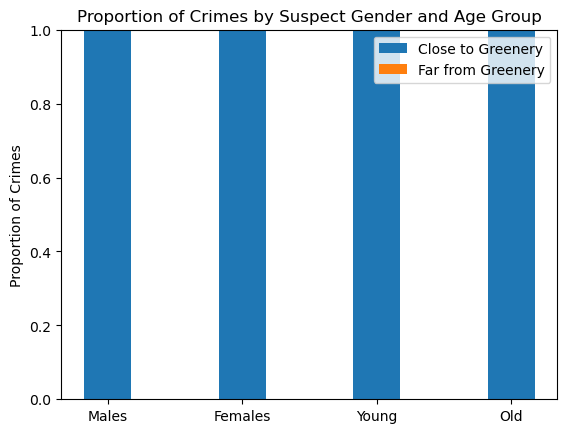

In [32]:
# Create a stacked bar chart
labels = ['Males', 'Females', 'Young', 'Old']
close = [prop_males_close, prop_females_close, prop_young_close, prop_old_close]
far = [prop_males_far, prop_females_far, prop_young_far, prop_old_far]
width = 0.35
x = [i for i in range(len(labels))]

fig, ax = plt.subplots()
ax.bar(x, close, width, label='Close to Greenery')
ax.bar(x, far, width, bottom=close, label='Far from Greenery')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Proportion of Crimes')
ax.set_title('Proportion of Crimes by Suspect Gender and Age Group')
ax.legend()

plt.show()

-

<b>Correct Answer:</b>

<div class="alert alert-block alert-success">

    
<b>Q5 - a)</b> 

    age  credit

    1.0  1.0       36

         2.0       13
     
    0.0  1.0       28

         2.0       21

    sex  credit
    
    1.0  1.0       36
    0.0  1.0       32
    1.0  2.0       13
    0.0  2.0       17

For both protected attributes, the numbers are unequal. There is a certain bias.
Younger applicants tend to receive less positive outcomes than older ones. Male tend to receive more positive outcomes than females.

--------------

<b>Q5 - b)</b>  In the case where the real-world situation is considered fair, we might consider a classifier trained on this data fair. However, we would need to check whether its outputs indeed reflect these input distributions (this might not be the case when the classifier makes systematic mistakes, as Q5 showed inbalance, it might indeed make mistakes).

Often though, the real-world situation is considered unfair (e.g., credit ratings are given depending on some human biases) and hence datasets of historical decisions are unfair. A fair situation would often be if both the protected and unprotected groups have an equal likelihood of getting good/bad credit. Fot instance, there would be 21 good credits out of 50 for both "old" and "young" people. In such case, a classifier trained on the data we have here would not be considered fair.



</div>

## Part IV. Discuss Measurement Bias.

Measurement Biases occur when choosing, collecting, or computing inadequate features and labels to use in a prediction problem. Features and labels are the concrete measurements chosen to approximate some construct (an idea or concept) that is not directly encoded or observable.
</br></br>

<b>Q6: Reflect on your featuers and lables</b> </br>
There is no "simple" answer to this question, nor a "technical" quick fix. Your reflection and analysis should be contextual and responsible. Use outputs from Lecture 1 and the Responsible Data Guiding Principles from (D’Ignazio & Klein, 2016) to carry out your analysis and identify measurement bias in your data project. In the following, we provide a set of guiding questions that could help you articulate your thoughts and discussion for this type of bias. 

***Sample of Guiding questions:***

a) Are you using inclusive non-harmful featuers and lables? 

b) Is your dataset making any harmful or discriminatory abstractions.

c) Are you using the correct "proxy"/"lable" to predict the correct "concept"

***Important Note***
The german data set is a processed and simplified dataset. It is not obvious what assumptions were made to clean and label the dataset there, for it is hard to identify Measurement Biases in this dataset. It does not mean it is bias-free. On the contrary, this should warn you about using pre-processed, pre-packaged datasets. They are loaded with biases you can not identify and asses


## End of the Lab, Well Done!